In [2]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [15]:
response = requests.get('https://api.openbrewerydb.org/breweries?page= 0')

In [ ]:
response

In [23]:
type(response)

requests.models.Response

In [25]:
type(response.json())

list

In [29]:
results = response.json()

In [30]:
results

[{'id': 'bnaf-llc-austin',
  'name': 'Bnaf, LLC',
  'brewery_type': 'planning',
  'street': None,
  'address_2': None,
  'address_3': None,
  'city': 'Austin',
  'state': 'Texas',
  'county_province': None,
  'postal_code': '78727-7602',
  'country': 'United States',
  'longitude': None,
  'latitude': None,
  'phone': None,
  'website_url': None,
  'updated_at': '2018-07-24T00:00:00.000Z',
  'created_at': '2018-07-24T00:00:00.000Z'},
 {'id': 'boulder-beer-co-boulder',
  'name': 'Boulder Beer Co',
  'brewery_type': 'regional',
  'street': '2880 Wilderness Pl',
  'address_2': None,
  'address_3': None,
  'city': 'Boulder',
  'state': 'Colorado',
  'county_province': None,
  'postal_code': '80301-5401',
  'country': 'United States',
  'longitude': '-105.2480158',
  'latitude': '40.026439',
  'phone': None,
  'website_url': None,
  'updated_at': '2018-08-24T00:00:00.000Z',
  'created_at': '2018-07-24T00:00:00.000Z'},
 {'id': 'clermont-brewing-company-clermont',
  'name': 'Clermont Brewing 

In [6]:
brewery =pd.json_normalize(results)

In [7]:
# estatistica de produção e venda  de cerveja a nivel estadual. 
# numero de cervjarias artsenais por cidade, 
brewery

,id,name,brewery_type,street,address_2,address_3,city,state,county_province,postal_code,country,longitude,latitude,phone,website_url,updated_at,created_at
0,bnaf-llc-austin,"Bnaf, LLC",planning,None,None,None,Austin,Texas,None,78727-7602,United States,None,None,None,None,2018-07-24T00:00:00.000Z,2018-07-24T00:00:00.000Z
1,boulder-beer-co-boulder,Boulder Beer Co,regional,2880 Wilderness Pl,None,None,Boulder,Colorado,None,80301-5401,United States,-105.2480158,40.026439,None,None,2018-08-24T00:00:00.000Z,2018-07-24T00:00:00.000Z
2,clermont-brewing-company-clermont,Clermont Brewing Company,planning,None,None,None,Clermont,Florida,None,34711-2108,United States,None,None,None,None,2018-08-11T00:00:00.000Z,2018-07-24T00:00:00.000Z
3,dimensional-brewing-co-dubuque,Dimensional Brewing Co.,planning,None,None,None,Dubuque,Iowa,None,52001,United States,None,None,None,http://www.dimensionalbrewing.com,2018-08-11T00:00:00.000Z,2018-07-24T00:00:00.000Z
4,dixie-brewing-co-inc-new-orleans,Dixie Brewing Co Inc.,contract,6221 S Claiborne Ave Ste 101,None,None,New Orleans,Louisiana,None,70125-4191,United States,None,None,5048228711,None,2018-08-11T00:00:00.000Z,2018-07-24T00:00:00.000Z
5,epidemic-ales-concord,Epidemic Ales,micro,150 Mason Circle Stes I&J,None,None,Concord,California,None,94520,United States,None,None,9255668850,http://www.epidemicales.com,2018-08-11T00:00:00.000Z,2018-07-24T00:00:00.000Z
6,goose-island-philadelphia-philadelphia,Goose Island Philadelphia,brewpub,1002 Canal St,None,None,Philadelphia,Pennsylvania,None,19123,United States,-75.13506341,39.9648491,None,None,2018-08-24T00:00:00.000Z,2018-07-24T00:00:00.000Z
7,grits-brewing-chamblee,GRITS Brewing,planning,None,None,None,Chamblee,Georgia,None,30341-2024,United States,None,None,None,None,2018-08-11T00:00:00.000Z,2018-07-24T00:00:00.000Z
8,ironbark-brewery-jackson,Ironbark Brewery,micro,2610 Kibby Rd,None,None,Jackson,Michigan,None,49203-4908,United States,-84.43762976,42.2188971,5177487988,None,2018-08-24T00:00:00.000Z,2018-07-24T00:00:00.000Z
9,king-fox-brewery-hialeah,King Fox Brewery,planning,None,None,None,Hialeah,Florida,None,33014-5231,United States,None,None,None,None,2018-08-11T00:00:00.000Z,2018-07-24T00:00:00.000Z


In [38]:
brewery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               20 non-null     object
 1   name             20 non-null     object
 2   brewery_type     20 non-null     object
 3   street           17 non-null     object
 4   address_2        0 non-null      object
 5   address_3        0 non-null      object
 6   city             20 non-null     object
 7   state            20 non-null     object
 8   county_province  0 non-null      object
 9   postal_code      20 non-null     object
 10  country          20 non-null     object
 11  longitude        11 non-null     object
 12  latitude         11 non-null     object
 13  phone            17 non-null     object
 14  website_url      17 non-null     object
 15  updated_at       20 non-null     object
 16  created_at       20 non-null     object
dtypes: object(17)
memory usage: 2.8+ KB


In [31]:
df.columns

Index(['id', 'name', 'brewery_type', 'street', 'address_2', 'address_3',
       'city', 'state', 'county_province', 'postal_code', 'country',
       'longitude', 'latitude', 'phone', 'website_url', 'updated_at',
       'created_at'],
      dtype='object')

<AxesSubplot:>

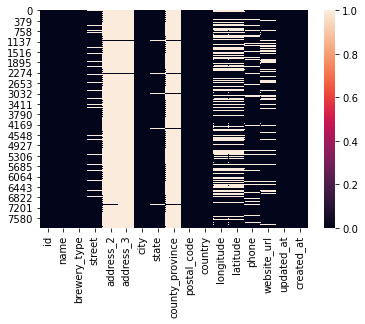

In [33]:
import seaborn as sns
sns.heatmap(df.isnull())

In [40]:
df.drop(columns=['address_2', 'address_3', 'county_province'], inplace=True)
df

,id,name,brewery_type,street,city,state,postal_code,country,longitude,latitude,phone,website_url,updated_at,created_at
0,bnaf-llc-austin,"Bnaf, LLC",planning,None,Austin,Texas,78727-7602,United States,None,None,None,None,2018-07-24T00:00:00.000Z,2018-07-24T00:00:00.000Z
1,boulder-beer-co-boulder,Boulder Beer Co,regional,2880 Wilderness Pl,Boulder,Colorado,80301-5401,United States,-105.2480158,40.026439,None,None,2018-08-24T00:00:00.000Z,2018-07-24T00:00:00.000Z
2,clermont-brewing-company-clermont,Clermont Brewing Company,planning,None,Clermont,Florida,34711-2108,United States,None,None,None,None,2018-08-11T00:00:00.000Z,2018-07-24T00:00:00.000Z
3,dimensional-brewing-co-dubuque,Dimensional Brewing Co.,planning,None,Dubuque,Iowa,52001,United States,None,None,None,http://www.dimensionalbrewing.com,2018-08-11T00:00:00.000Z,2018-07-24T00:00:00.000Z
4,dixie-brewing-co-inc-new-orleans,Dixie Brewing Co Inc.,contract,6221 S Claiborne Ave Ste 101,New Orleans,Louisiana,70125-4191,United States,None,None,5048228711,None,2018-08-11T00:00:00.000Z,2018-07-24T00:00:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7935,zelus-beer-company-medfield,ZeLUS Beer Company,contract,120 N Meadows Rd,Medfield,Massachusetts,02052-1594,United States,-71.335472,42.200799,6275100270,http://www.zelusbeer.com,2018-08-24T00:00:00.000Z,2018-07-24T00:00:00.000Z
7936,zephyr-brewing-co-denver,Zephyr Brewing Co,micro,1609 E 58th Ave Ste G,Denver,Colorado,80216-1528,United States,None,None,7202959374,http://www.zephyrbrewingco.com,2018-08-11T00:00:00.000Z,2018-07-24T00:00:00.000Z
7937,zephyrhills-brewing-company-zephyrhills,Zephyrhills Brewing Company,proprietor,38530 5th Ave,Zephyrhills,Florida,33542-4318,United States,-82.17921783,28.23444039,8137152683,http://www.zbcbeer.com,2018-08-24T00:00:00.000Z,2018-07-24T00:00:00.000Z
7938,zero-gravity-craft-brewery-burlington,Zero Gravity Craft Brewery,micro,716 Pinte Street,Burlington,Vermont,5401,United States,None,None,8024970054,None,2018-08-11T00:00:00.000Z,2018-07-24T00:00:00.000Z


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7940 entries, 0 to 7939
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            7940 non-null   object
 1   name          7940 non-null   object
 2   brewery_type  7940 non-null   object
 3   street        7105 non-null   object
 4   city          7940 non-null   object
 5   state         7798 non-null   object
 6   postal_code   7940 non-null   object
 7   country       7940 non-null   object
 8   longitude     5067 non-null   object
 9   latitude      5067 non-null   object
 10  phone         7118 non-null   object
 11  website_url   6729 non-null   object
 12  updated_at    7940 non-null   object
 13  created_at    7940 non-null   object
dtypes: object(14)
memory usage: 868.6+ KB


<AxesSubplot:>

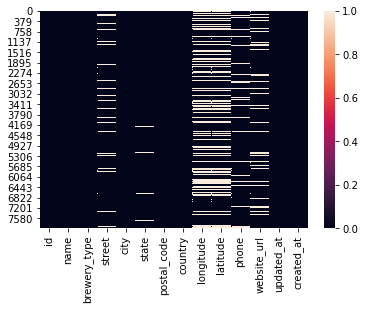

In [42]:
sns.heatmap(df.isnull())

In [9]:
dfs = list()
for page in range(0, 397):
        url = f'https://api.openbrewerydb.org/breweries?page= {page}'

        response = requests.get(url)
        results = response.json()
        brewery = pd.json_normalize(results)
        
        dfs.append(pd.DataFrame(brewery))  

In [10]:
df = pd.concat(dfs, ignore_index = True)

In [11]:
df.head()

,id,name,brewery_type,street,address_2,address_3,city,state,county_province,postal_code,country,longitude,latitude,phone,website_url,updated_at,created_at
0,bnaf-llc-austin,"Bnaf, LLC",planning,None,None,None,Austin,Texas,None,78727-7602,United States,None,None,None,None,2018-07-24T00:00:00.000Z,2018-07-24T00:00:00.000Z
1,boulder-beer-co-boulder,Boulder Beer Co,regional,2880 Wilderness Pl,None,None,Boulder,Colorado,None,80301-5401,United States,-105.2480158,40.026439,None,None,2018-08-24T00:00:00.000Z,2018-07-24T00:00:00.000Z
2,clermont-brewing-company-clermont,Clermont Brewing Company,planning,None,None,None,Clermont,Florida,None,34711-2108,United States,None,None,None,None,2018-08-11T00:00:00.000Z,2018-07-24T00:00:00.000Z
3,dimensional-brewing-co-dubuque,Dimensional Brewing Co.,planning,None,None,None,Dubuque,Iowa,None,52001,United States,None,None,None,http://www.dimensionalbrewing.com,2018-08-11T00:00:00.000Z,2018-07-24T00:00:00.000Z
4,dixie-brewing-co-inc-new-orleans,Dixie Brewing Co Inc.,contract,6221 S Claiborne Ave Ste 101,None,None,New Orleans,Louisiana,None,70125-4191,United States,None,None,5048228711,None,2018-08-11T00:00:00.000Z,2018-07-24T00:00:00.000Z


In [12]:
df['brewery_type'].value_counts()

micro         4170
brewpub       2377
planning       746
regional       227
contract       205
large           79
proprietor      69
closed          54
taproom         11
bar              1
nano             1
Name: brewery_type, dtype: int64

In [13]:
df['state'].nunique()

52

In [14]:
requests.get('https://api.openbrewerydb.org/breweries?by_type=micro').json()

[{'id': 'epidemic-ales-concord',
  'name': 'Epidemic Ales',
  'brewery_type': 'micro',
  'street': '150 Mason Circle Stes I&J',
  'address_2': None,
  'address_3': None,
  'city': 'Concord',
  'state': 'California',
  'county_province': None,
  'postal_code': '94520',
  'country': 'United States',
  'longitude': None,
  'latitude': None,
  'phone': '9255668850',
  'website_url': 'http://www.epidemicales.com',
  'updated_at': '2018-08-11T00:00:00.000Z',
  'created_at': '2018-07-24T00:00:00.000Z'},
 {'id': 'ironbark-brewery-jackson',
  'name': 'Ironbark Brewery',
  'brewery_type': 'micro',
  'street': '2610 Kibby Rd',
  'address_2': None,
  'address_3': None,
  'city': 'Jackson',
  'state': 'Michigan',
  'county_province': None,
  'postal_code': '49203-4908',
  'country': 'United States',
  'longitude': '-84.43762976',
  'latitude': '42.2188971',
  'phone': '5177487988',
  'website_url': None,
  'updated_at': '2018-08-24T00:00:00.000Z',
  'created_at': '2018-07-24T00:00:00.000Z'},
 {'id'